In [1]:
pip install tensorflow numpy matplotlib

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers

In [3]:
(train_images,train_labels),(_,_)=tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [4]:
train_images=train_images.reshape(train_images.shape[0],28,28,1).astype('float32')
train_images=(train_images-127.5)/127.5

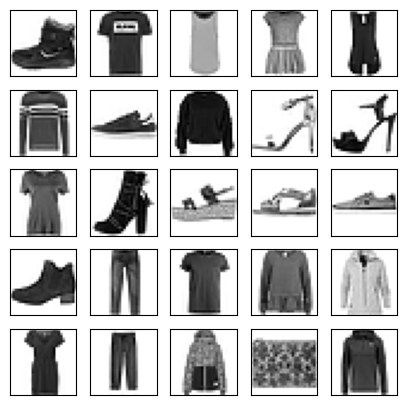

In [5]:
plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()

In [6]:
BUFFER_SIZE=6000
BATCH_SIZE=256

In [7]:
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

generator

In [8]:
def build_generator():
    model = tf.keras.Sequential([
        layers.Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Reshape((7, 7, 256)),
        layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False),
        layers.BatchNormalization(),
        layers.LeakyReLU(),

        layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh')
    ])
    return model

discriminator

In [9]:
def build_discriminator():
    model = tf.keras.Sequential([
        layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'),
        layers.LeakyReLU(),
        layers.Dropout(0.3),

        layers.Flatten(),
        layers.Dense(1)
    ])
    return model


In [10]:
generator=build_generator()
discriminator=build_discriminator()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
generator.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 12544)               │       1,254,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 12544)               │          50,176 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu (LeakyReLU)              │ (None, 12544)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 7, 7, 128)           │         819,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 7, 7, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_1 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 14, 14, 64)          │         204,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 14, 14, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_2 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 28, 28, 1)           │           1,600 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,330,944 (8.89 MB)

 Trainable params: 2,305,472 (8.79 MB)

 Non-trainable params: 25,472 (99.50 KB)

In [12]:
discriminator.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 14, 14, 64)          │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_3 (LeakyReLU)            │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 14, 14, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 7, 7, 128)           │         204,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_4 (LeakyReLU)            │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 7, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 6272)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │           6,273 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 212,865 (831.50 KB)

 Trainable params: 212,865 (831.50 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
cross_entropy=tf.keras.losses.BinaryCrossentropy(from_logits=True)

loss:

In [14]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [15]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

optimizer

In [16]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)


In [17]:
EPOCHS = 200
noise_dim = 100
num_examples_to_generate = 16

In [18]:
seed = tf.random.normal([num_examples_to_generate, noise_dim])


In [19]:
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

        gen_acc = tf.keras.metrics.binary_accuracy(tf.ones_like(fake_output), fake_output)
        disc_acc = tf.keras.metrics.binary_accuracy(tf.concat([tf.ones_like(real_output), tf.zeros_like(fake_output)], axis=0), tf.concat([real_output, fake_output], axis=0))


    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

    return gen_loss, disc_loss, disc_acc, gen_acc


In [20]:
def generate_and_save_images(model, epoch, test_input):
    predictions = model(test_input, training=False)
    plt.figure(figsize=(4, 4))

    for i in range(predictions.shape[0]):
        plt.subplot(4, 4, i+1)
        plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
        plt.axis('off')

    plt.savefig(f'image_at_epoch_{epoch:04d}.png')
    plt.show()


In [21]:
def train(dataset, epochs):
    for epoch in range(epochs):
      for image_batch in dataset:
         g_loss,d_loss,_,_=train_step(image_batch)
      if (epoch + 1) % 5 == 0:
          print(f'Epoch {epoch + 1}/{epochs}, Discriminator Loss: {d_loss:.4f}, Generator Loss: {g_loss:.4f}')
          generate_and_save_images(generator, epoch + 1, seed)

Epoch 5/200, Discriminator Loss: 1.3874, Generator Loss: 0.8769


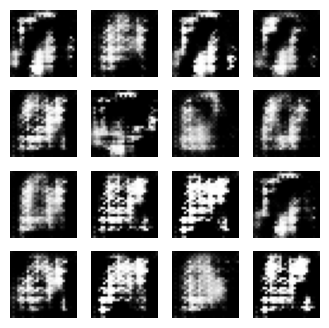

Epoch 10/200, Discriminator Loss: 0.6358, Generator Loss: 1.6354


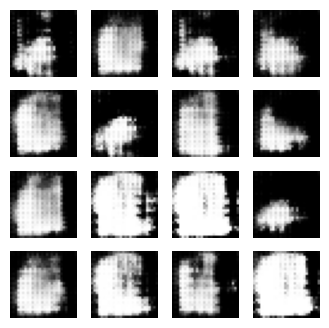

Epoch 15/200, Discriminator Loss: 0.9645, Generator Loss: 1.2276


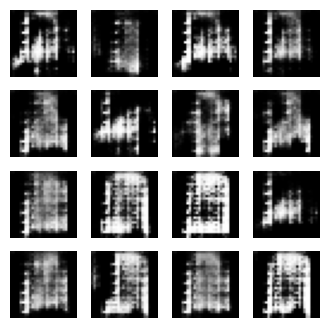

Epoch 20/200, Discriminator Loss: 1.0095, Generator Loss: 1.1741


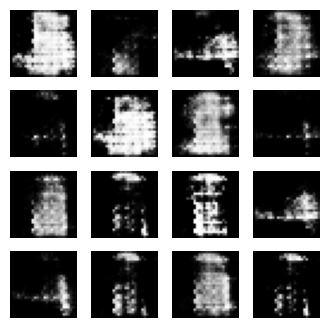

Epoch 25/200, Discriminator Loss: 0.5615, Generator Loss: 1.8912


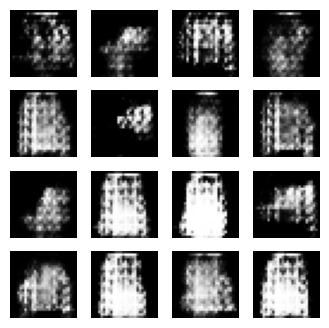

Epoch 30/200, Discriminator Loss: 0.8499, Generator Loss: 1.6196


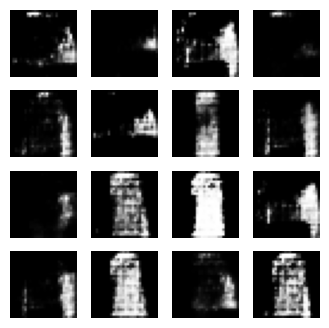

Epoch 35/200, Discriminator Loss: 0.8089, Generator Loss: 1.6429


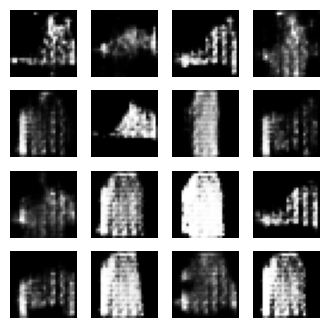

Epoch 40/200, Discriminator Loss: 0.9305, Generator Loss: 1.6981


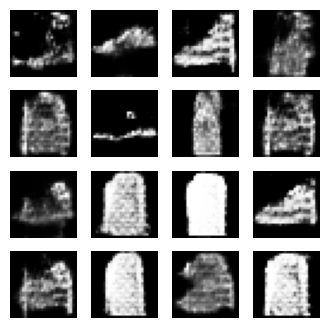

Epoch 45/200, Discriminator Loss: 0.5915, Generator Loss: 1.8264


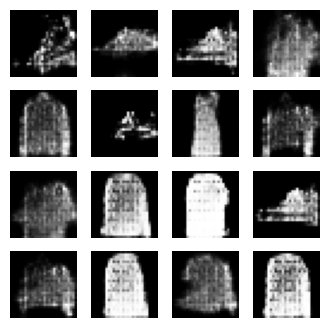

Epoch 50/200, Discriminator Loss: 0.9619, Generator Loss: 1.3260


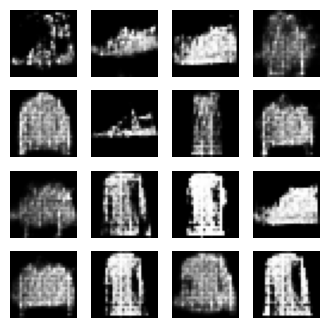

Epoch 55/200, Discriminator Loss: 1.1078, Generator Loss: 1.3016


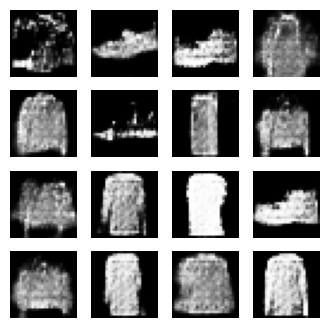

Epoch 60/200, Discriminator Loss: 0.8893, Generator Loss: 1.5179


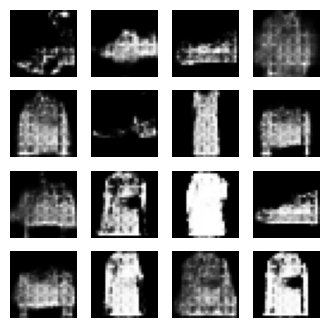

Epoch 65/200, Discriminator Loss: 1.0547, Generator Loss: 1.3559


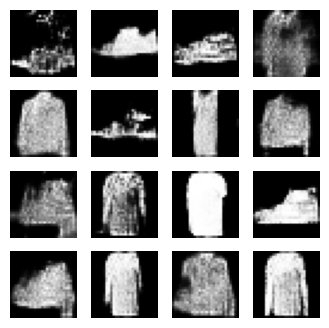

Epoch 70/200, Discriminator Loss: 1.0435, Generator Loss: 1.4336


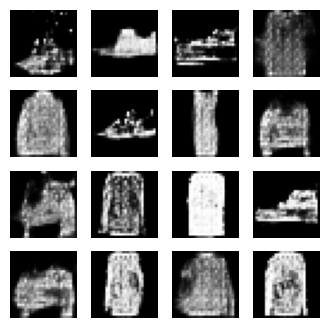

Epoch 75/200, Discriminator Loss: 0.9531, Generator Loss: 1.3067


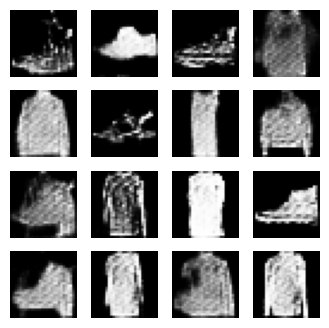

Epoch 80/200, Discriminator Loss: 0.9149, Generator Loss: 1.3039


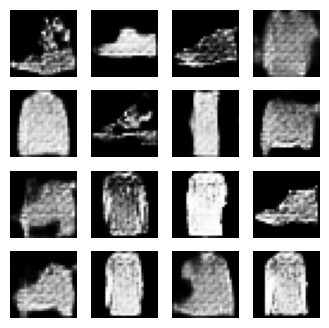

Epoch 85/200, Discriminator Loss: 0.8350, Generator Loss: 1.5289


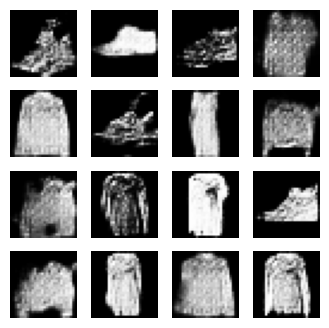

Epoch 90/200, Discriminator Loss: 1.0613, Generator Loss: 1.2370


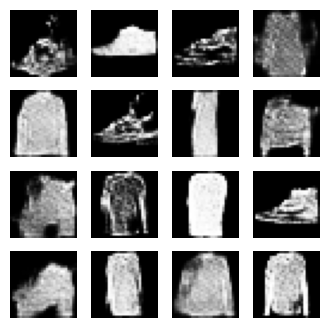

Epoch 95/200, Discriminator Loss: 1.2299, Generator Loss: 1.0928


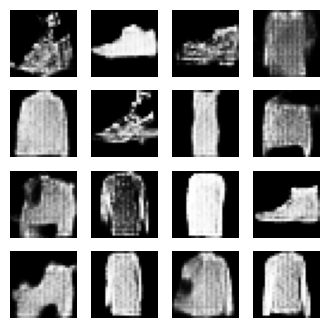

Epoch 100/200, Discriminator Loss: 1.0405, Generator Loss: 1.0458


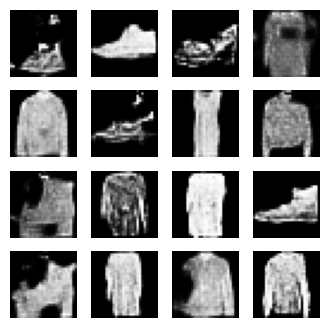

Epoch 105/200, Discriminator Loss: 1.2786, Generator Loss: 1.1162


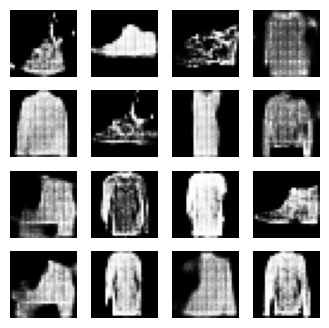

Epoch 110/200, Discriminator Loss: 0.9687, Generator Loss: 1.2961


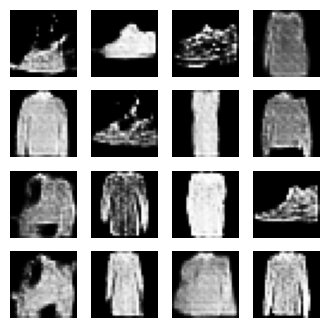

Epoch 115/200, Discriminator Loss: 1.3431, Generator Loss: 1.1795


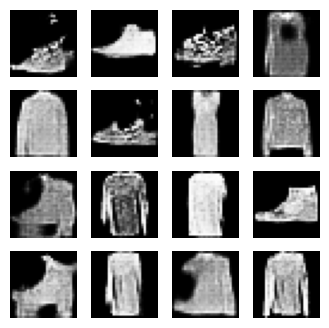

Epoch 120/200, Discriminator Loss: 0.8734, Generator Loss: 1.6855


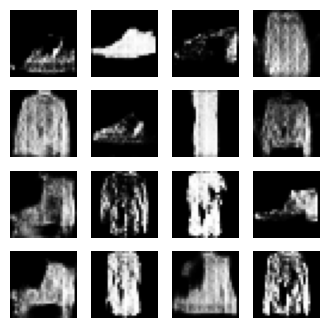

Epoch 125/200, Discriminator Loss: 1.0501, Generator Loss: 1.3913


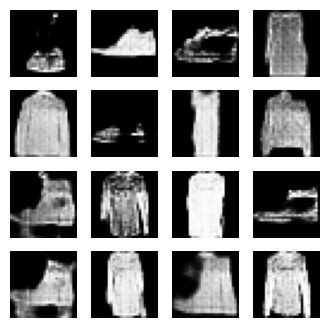

Epoch 130/200, Discriminator Loss: 1.4506, Generator Loss: 1.0494


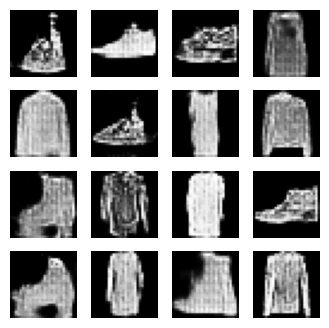

Epoch 135/200, Discriminator Loss: 1.1055, Generator Loss: 1.3071


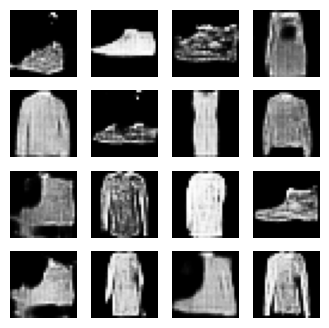

Epoch 140/200, Discriminator Loss: 1.1823, Generator Loss: 1.0139


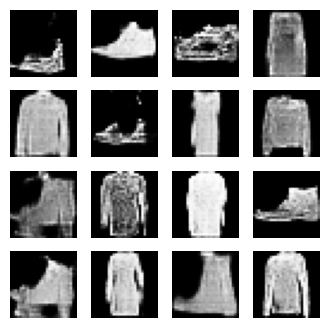

Epoch 145/200, Discriminator Loss: 0.9145, Generator Loss: 1.3974


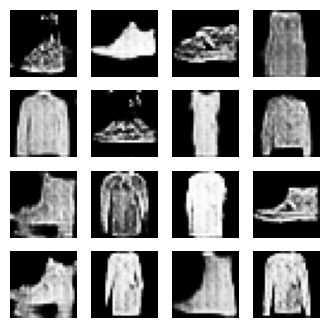

Epoch 150/200, Discriminator Loss: 1.1546, Generator Loss: 1.0026


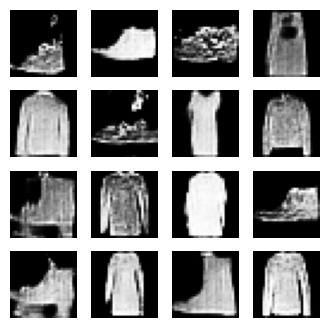

Epoch 155/200, Discriminator Loss: 1.1282, Generator Loss: 1.1359


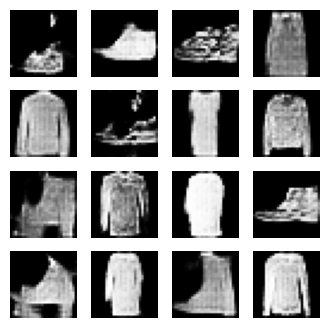

Epoch 160/200, Discriminator Loss: 1.2109, Generator Loss: 1.1598


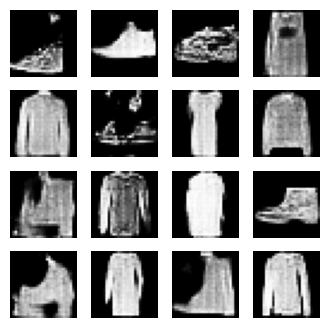

Epoch 165/200, Discriminator Loss: 1.0983, Generator Loss: 1.0573


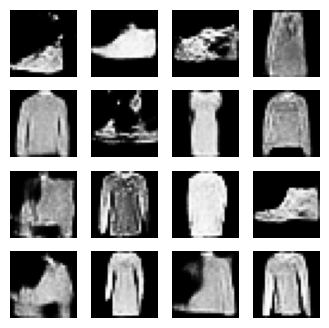

Epoch 170/200, Discriminator Loss: 1.1768, Generator Loss: 1.2646


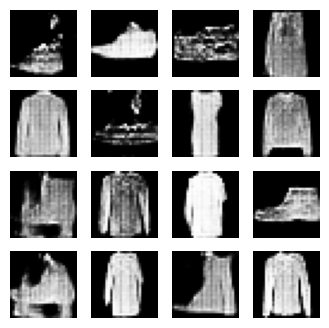

Epoch 175/200, Discriminator Loss: 1.1841, Generator Loss: 1.0352


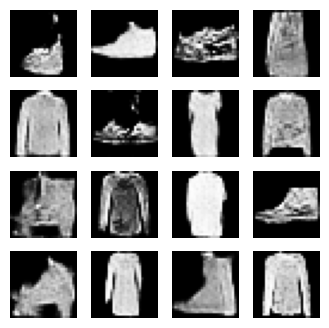

Epoch 180/200, Discriminator Loss: 1.1665, Generator Loss: 1.0775


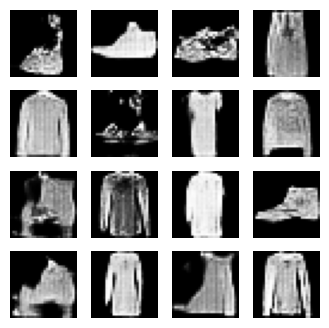

Epoch 185/200, Discriminator Loss: 1.0945, Generator Loss: 1.0461


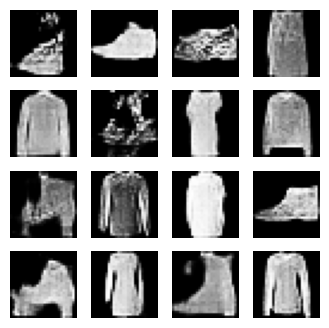

Epoch 190/200, Discriminator Loss: 1.2085, Generator Loss: 1.0131


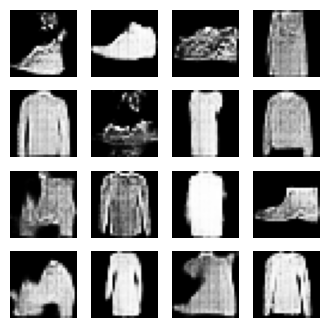

Epoch 195/200, Discriminator Loss: 1.2606, Generator Loss: 1.1015


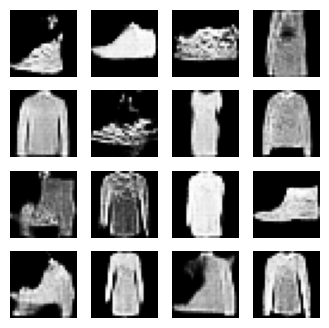

Epoch 200/200, Discriminator Loss: 1.2661, Generator Loss: 1.0364


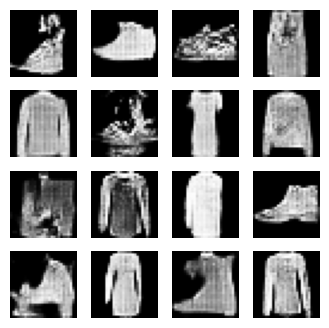

In [22]:
train(train_dataset, EPOCHS)


In [23]:
generator.save('generator.keras')